In [80]:
#import librery
import pandas as pd
import numpy as np 
import plotly.offline as py
import plotly.graph_objs as pyoff
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import matplotlib.cm as cm

In [81]:
#Load file
df = pd.read_csv('C:/Users/User/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
#Top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
#convert dependent variable(churn) from alpha to numeric
df.loc[df.Churn=='No','Churn'] = 0.0
df.loc[df.Churn=='Yes','Churn'] = 1.0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df['Churn']=df.Churn.astype(int)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
df_plot = df.groupby('gender').Churn.mean().reset_index()
df_plot

,gender,Churn
0,Female,0.269209
1,Male,0.261603


In [86]:
df_plot = df.groupby('SeniorCitizen').Churn.mean().reset_index()
df_plot

,SeniorCitizen,Churn
0,0,0.236062
1,1,0.416813


In [87]:
df_plot = df.groupby('InternetService').Churn.mean().reset_index()
df_plot

,InternetService,Churn
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


In [88]:
df_plot = df.groupby('Dependents').Churn.mean().reset_index()
df_plot

,Dependents,Churn
0,No,0.312791
1,Yes,0.154502


In [89]:
df_plot = df.groupby('PhoneService').Churn.mean().reset_index()
df_plot

,PhoneService,Churn
0,No,0.249267
1,Yes,0.267096


In [90]:
df_plot = df.groupby('TechSupport').Churn.mean().reset_index()
df_plot

,TechSupport,Churn
0,No,0.416355
1,No internet service,0.074050
2,Yes,0.151663


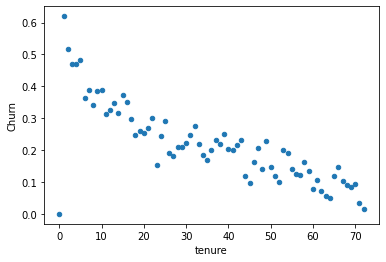

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
Tenure_Cluster = df.groupby('tenure').Churn.mean().reset_index()
Tenure_Cluster.plot(kind='scatter',x='tenure',y='Churn')
plt.show()

In [92]:
mms=MinMaxScaler()
mms.fit(Tenure_Cluster)
Tenure_Cluster=mms.transform(Tenure_Cluster)

In [93]:
Tenure_Cluster=pd.DataFrame(Tenure_Cluster, columns=['tenure','Churn'])

In [94]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Tenure_Cluster)
    Sum_of_squared_distances.append(km.inertia_)

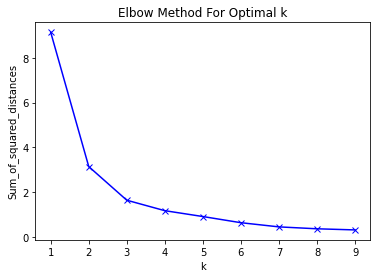

In [95]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
Tenure_output=df[['tenure','Churn']]
Tenure_output

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,0
7041,4,1


In [97]:
km3=KMeans(n_clusters=3)
km3=km3.fit(Tenure_output)

In [98]:
print(km3.labels_)
result=km3.labels_
result=pd.DataFrame(result, columns=['tenure_clusters'])
result.groupby('tenure_clusters').size()

[2 0 2 ... 2 2 1]


tenure_clusters
0    1926
1    2239
2    2878
dtype: int64

In [99]:
tenure_cluster=km3.cluster_centers_
tenure_cluster=pd.DataFrame(tenure_cluster, columns=['Centriod_Year','Centroid_tenure'])
tenure_cluster

,Centriod_Year,Centroid_tenure
0,33.854102,0.210280
1,63.048682,0.095132
2,7.512509,0.434677


In [100]:
df['Tenure_Group'] = 'Low'
df.loc[df['tenure'] < 8,'Tenure_Group'] = 'Low'
df.loc[(df['tenure'] > 8) & (df['tenure'] < 63), 'Tenure_Group'] = 'Medium'
df.loc[df['tenure'] > 62,'Tenure_Group'] = 'High'
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Medium
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,High
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Medium
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,Low


In [101]:
df_plot = df.groupby('Tenure_Group').Churn.mean().reset_index()
df_plot

,Tenure_Group,Churn
0,High,0.063442
1,Low,0.505476
2,Medium,0.225352


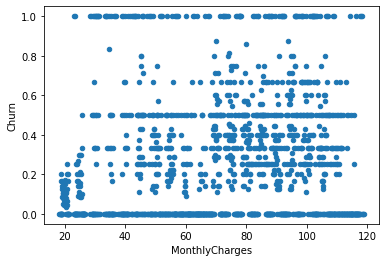

In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
Monthly_Cluster = df.groupby('MonthlyCharges').Churn.mean().reset_index()
Monthly_Cluster.plot(kind='scatter',x='MonthlyCharges',y='Churn')
plt.show()

In [103]:
mms=MinMaxScaler()
mms.fit(Monthly_Cluster)
Monthly_Cluster=mms.transform(Monthly_Cluster)

In [104]:
Monthly_Cluster=pd.DataFrame(Monthly_Cluster, columns=['MonthlyCharges','Churn'])

In [105]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Monthly_Cluster)
    Sum_of_squared_distances.append(km.inertia_)

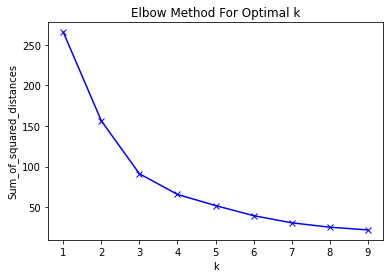

In [106]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [107]:
Monthly_output=df[['MonthlyCharges','Churn']]
Monthly_output

,MonthlyCharges,Churn
0,29.85,0
1,56.95,0
2,53.85,1
3,42.30,0
4,70.70,1
...,...,...
7038,84.80,0
7039,103.20,0
7040,29.60,0
7041,74.40,1


In [108]:
km3=KMeans(n_clusters=3)
km3=km3.fit(Monthly_output)

In [109]:
print(km3.labels_)
result=km3.labels_
result=pd.DataFrame(result, columns=['Monthly_clusters'])
result.groupby('Monthly_clusters').size()

[1 2 2 ... 1 2 0]


Monthly_clusters
0    2912
1    1892
2    2239
dtype: int64

In [110]:
Monthly_clusters=km3.cluster_centers_
Monthly_clusters=pd.DataFrame(Monthly_clusters, columns=['Centriod_Year','Centroid_tenure'])
Monthly_clusters

,Centriod_Year,Centroid_tenure
0,94.054258,0.345467
1,23.384619,0.121036
2,61.628808,0.283162


In [111]:
df['Monthly_Group'] = 'Low'
df.loc[df['MonthlyCharges'] < 24,'Monthly_Group'] = 'Low'
df.loc[(df['MonthlyCharges'] > 24) & (df['MonthlyCharges'] < 95), 'Monthly_Group'] = 'Medium'
df.loc[df['MonthlyCharges'] > 94,'Monthly_Group'] = 'High'
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,Monthly_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low,Medium
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,Medium,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low,Medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Medium,Medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Medium,Medium
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,High,High
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Medium,Medium
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,Low,Medium


In [112]:
df_plot = df.groupby('Monthly_Group').Churn.mean().reset_index()
df_plot

,Monthly_Group,Churn
0,High,0.330791
1,Low,0.087243
2,Medium,0.293206


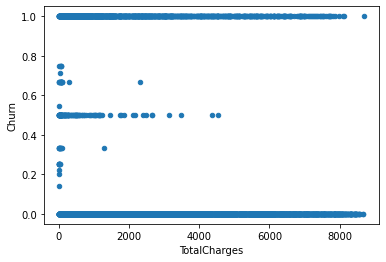

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
Total_Cluster = df.groupby('TotalCharges').Churn.mean().reset_index()
Total_Cluster.plot(kind='scatter',x='TotalCharges',y='Churn')
plt.show()

In [114]:
mms=MinMaxScaler()
mms.fit(Total_Cluster)
Total_Cluster=mms.transform(Total_Cluster)

In [115]:
Total_Cluster=pd.DataFrame(Total_Cluster, columns=['TotalCharges','Churn'])

In [116]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Total_Cluster)
    Sum_of_squared_distances.append(km.inertia_)

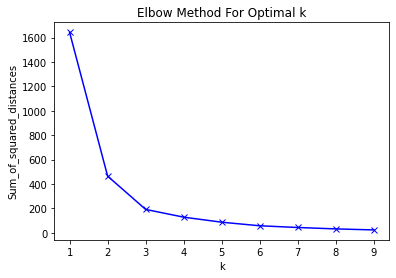

In [117]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [118]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [119]:
Total_output=df[['TotalCharges','Churn']]
Total_output

,TotalCharges,Churn
0,29.85,0
1,1889.50,0
2,108.15,1
3,1840.75,0
4,151.65,1
...,...,...
7038,1990.50,0
7039,7362.90,0
7040,346.45,0
7041,306.60,1


In [120]:
km3=KMeans(n_clusters=3)
km3=km3.fit(Total_output)

In [121]:
print(km3.labels_)
result=km3.labels_
result=pd.DataFrame(result, columns=['Total_clusters'])
result.groupby('Total_clusters').size()

[2 2 2 ... 2 2 1]


Total_clusters
0    1613
1    1259
2    4171
dtype: int64

In [122]:
Total_clusters=km3.cluster_centers_
Total_clusters=pd.DataFrame(Total_clusters, columns=['Centriod_Year','Centroid_tenure'])
Total_clusters

,Centriod_Year,Centroid_tenure
0,3269.258328,0.222910
1,6291.771349,0.138095
2,683.465595,0.320298


In [123]:
df['Total_Group'] = 'Low'
df.loc[df['TotalCharges'] < 684, 'Total_Group'] = 'Low'
df.loc[(df['TotalCharges'] > 684) & (df['TotalCharges'] < 3270), 'Total_Group'] = 'Medium'
df.loc[df['TotalCharges'] > 3269,'Total_Group'] = 'High'
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,Monthly_Group,Total_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low,Medium,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,Medium,Medium,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low,Medium,Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Medium,Medium,Medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Low,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Medium,Medium,Medium
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,High,High,High
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Medium,Medium,Low
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,Low,Medium,Low


In [124]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in df.columns:
    if df[column].dtype == object and column != 'customerID':
        if df[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df[column] = le.fit_transform(df[column]) 
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
df = pd.get_dummies(data = df,columns = dummy_columns)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

In [129]:
import statsmodels.api as sm
X = df.drop(['Churn','customerID'], axis = 1)
model = sm.GLM.from_formula("Churn ~X", family = 
sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7013
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2890.8
Date:                Fri, 05 Mar 2021   Deviance:                       5781.6
Time:                        01:55:18   Pearson chi2:                 7.42e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1374      0.277      0.496      0.620      -0.406       0.680
X[0]          -0.0211      0.065     -0.323      0.747      -0.149       0.107
X[1]           0.2079      0.085      2.450      0.014       0.042       0.374
X[2]          -0.0006      0.078     -0.008      0.994      -0.154       0.153
X[3]          -0.1276      0.090     -1.415      0.157      -0.304       0.049
X[4]          -0.0344      0.007     -4.716      0.000      -0.049      -0.020
X[5]           0.2649      0.401      0.661      0.509      -0.521       1.050
X[6]           0.3508      0.075      4.666      0.000       0.203       0.498
X[7]          -0.0428      0.032     -1.336      0.181      -0.106       0.020
X[8]           0.0002   8.87e-05      1.845      0.065   -1.02e-05       0.000
X[9]          -0.1243      0.128     -0.972      0.331      -0.375       0.126
X[10]         -0.1275      0.140     -0.911      0.362      -0.402       0.147
X[11]          0.3892      0.283      1.376      0.169      -0.165       0.944
X[12]         -0.6973      0.227     -3.076      0.002      -1.142      -0.253
X[13]          1.1460      0.580      1.976      0.048       0.009       2.283
X[14]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[15]          0.3146      0.110      2.870      0.004       0.100       0.529
X[16]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[17]          0.1341      0.262      0.511      0.609      -0.380       0.648
X[18]          0.2089      0.108      1.927      0.054      -0.004       0.421
X[19]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[20]          0.2398      0.262      0.917      0.359      -0.273       0.752
X[21]          0.1372      0.109      1.257      0.209      -0.077       0.351
X[22]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[23]          0.3115      0.262      1.191      0.234      -0.201       0.824
X[24]          0.2971      0.109      2.716      0.007       0.083       0.512
X[25]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[26]          0.1516      0.263      0.576      0.564      -0.364       0.667
X[27]         -0.0739      0.052     -1.417      0.157      -0.176       0.028
X[28]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[29]          0.5226      0.340      1.536      0.124      -0.144       1.189
X[30]         -0.0813      0.052     -1.560      0.119      -0.183       0.021
X[31]         -0.3113      0.091     -3.406      0.001      -0.490      -0.132
X[32]          0.5300      0.340      1.557      0.119      -0.137       1.197
X[33]          0.7773      0.120      6.493      0.000       0.543       1.012
X[34]          0.1034      0.122      0.845      0.398      -0.136       0.343
X[

In [130]:
np.exp(result.params)

Intercept    1.147262
X[0]         0.979152
X[1]         1.231123
X[2]         0.999400
X[3]         0.880199
X[4]         0.966199
X[5]         1.303264
X[6]         1.420208
X[7]         0.958077
X[8]         1.000164
X[9]         0.883115
X[10]        0.880299
X[11]        1.475758
X[12]        0.497938
X[13]        3.145491
X[14]        0.732486
X[15]        1.369722
X[16]        0.732486
X[17]        1.143486
X[18]        1.232335
X[19]        0.732486
X[20]        1.270969
X[21]        1.147013
X[22]        0.732486
X[23]        1.365511
X[24]        1.345977
X[25]        0.732486
X[26]        1.163659
X[27]        0.928758
X[28]        0.732486
X[29]        1.686401
X[30]        0.921946
X[31]        0.732486
X[32]        1.698861
X[33]        2.175520
X[34]        1.108890
X[35]        0.475566
X[36]        1.009355
X[37]        0.917682
X[38]        1.345437
X[39]        0.920583
X[40]        0.856311
X[41]        1.709066
X[42]        0.783921
X[43]        1.098414
X[44]     

In [145]:
X = df.drop(['Churn','customerID'],axis=1)
y = df.Churn

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [147]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split


#building the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

[02:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.84


In [148]:
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       267
           1       0.70      0.63      0.66        86

    accuracy                           0.84       353
   macro avg       0.79      0.77      0.78       353
weighted avg       0.84      0.84      0.84       353



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

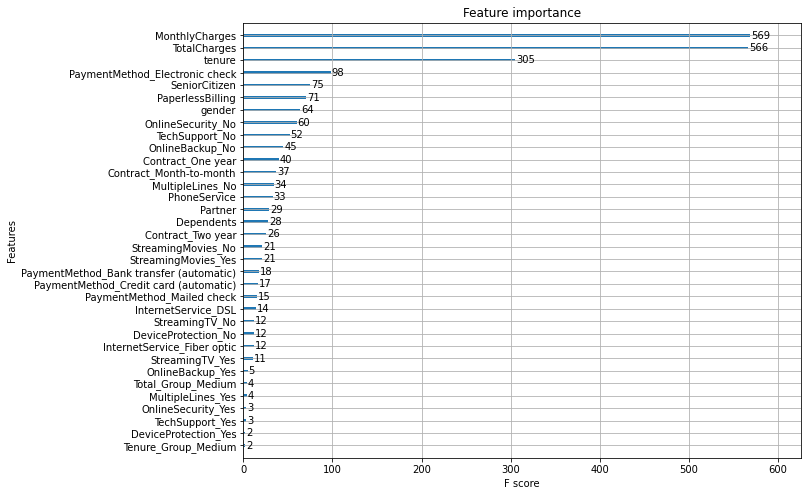

In [149]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [150]:
df['proba'] = xgb_model.predict_proba(df[X_train.columns])[:,1]

In [151]:
df[['customerID', 'proba']].head()

,customerID,proba
0,7590-VHVEG,0.563499
1,5575-GNVDE,0.034589
2,3668-QPYBK,0.359417
3,7795-CFOCW,0.031073
4,9237-HQITU,0.636300
